Preference： -5.29914553034
1.0
p = 1.0 -5.29914553034 聚类簇的个数为： 16
1.375
p = 1.4 -7.28632510422 聚类簇的个数为： 12
1.75
p = 1.8 -9.27350467809 聚类簇的个数为： 11
2.125
p = 2.1 -11.260684252 聚类簇的个数为： 10
2.5
p = 2.5 -13.2478638258 聚类簇的个数为： 9
2.875
p = 2.9 -15.2350433997 聚类簇的个数为： 8
3.25
p = 3.2 -17.2222229736 聚类簇的个数为： 55
3.625
p = 3.6 -19.2094025475 聚类簇的个数为： 107
4.0
p = 4.0 -21.1965821214 聚类簇的个数为： 7


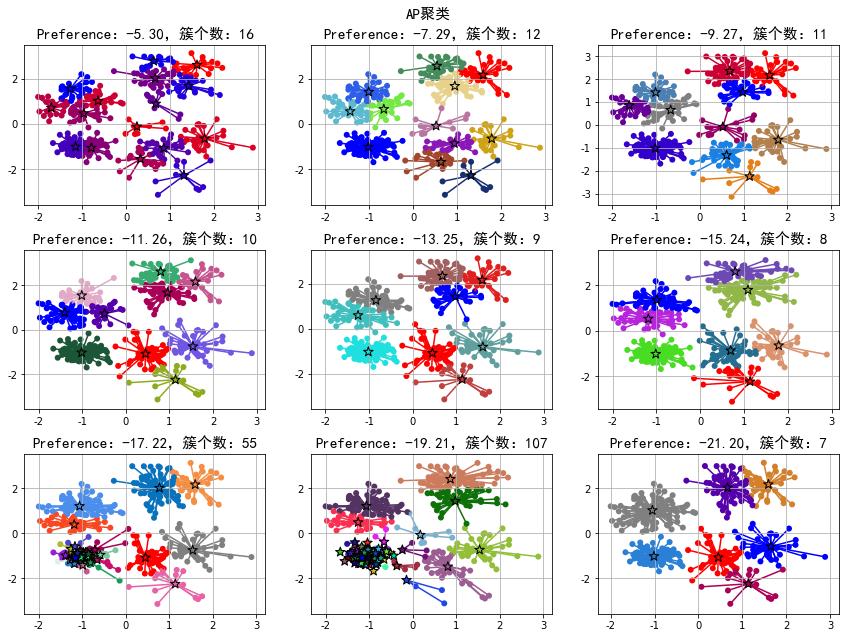

In [3]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import euclidean_distances
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

N = 400
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
m = euclidean_distances(data, squared=True)
preference = -np.median(m)
print 'Preference：', preference

plt.figure(figsize=(12, 9), facecolor='w')
for i, mul in enumerate(np.linspace(1, 4, 9)):
    print mul
    p = mul * preference
    model = AffinityPropagation(affinity='euclidean', preference=p)
    af = model.fit(data)
    center_indices = af.cluster_centers_indices_
    n_clusters = len(center_indices)
    print ('p = %.1f' % mul), p, '聚类簇的个数为：', n_clusters
    y_hat = af.labels_

    plt.subplot(3, 3, i + 1)
    plt.title(u'Preference：%.2f，簇个数：%d' % (p, n_clusters), fontproperties=fontproperties)
    clrs = []
    for c in np.linspace(16711680, 255, n_clusters):
        clrs.append('#%06x' % c)
    # clrs = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    for k, clr in enumerate(clrs):
        cur = (y_hat == k)
        plt.scatter(data[cur, 0], data[cur, 1], c=clr, edgecolors='none')
        center = data[center_indices[k]]
        for x in data[cur]:
            plt.plot([x[0], center[0]], [x[1], center[1]], color=clr, zorder=1)
    plt.scatter(data[center_indices, 0], data[center_indices, 1], s=100, c=clrs, marker='*', edgecolors='k', zorder=2)
    plt.grid(True)
plt.tight_layout()
plt.suptitle(u'AP聚类', fontsize=20, fontproperties=fontproperties)
plt.subplots_adjust(top=0.92)
plt.show()